# CODELAB 1

1. Memuat dataset dengan menggunakan library pandas menjadi dataframe.
2. Tampilkan 7 baris data awal dan tampilkan informasi dasar dataset.
3. Hitung jumlah iuran dan tentukan rata-rata iuran dari semua anggota.

In [26]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# 1. Load the dataset into a dataframe
df = pd.read_csv('International Logistic Association Memberships.csv')

In [29]:
# 2. Display the first 7 rows and basic information
print("First 7 rows of the dataset:")
print(df.head(7))

First 7 rows of the dataset:
   Member ID          Last name  First name              Address 1  \
0     100011               Tsao       Danny           27 Wu Tzu St   
1     100012                Lei     Colleen     88 6th Avenue Teda   
2     100013               Roth       Nancy       Hoefenstrasse 31   
3     100014  Meneses Contreras  Karl-Oscar  Poniente 134 Ste. 740   
4     100015              Nunez      Helmut      Andador Pinos 345   
5     100016        Fitzpatrick      Dmitry       22 Hemingford Pl   
6     100017             Andreu        Leya   Nevada de Colima 104   

              Address 2 Address 3    Address 4 Address 5 Dues amount  \
0           Tamshui 251       NaN       Taiwan       NaN        $200   
1        300457 TIANJIN       NaN        China       NaN        $500   
2            Muehlethal       NaN  Switzerland      4812        $100   
3          02300 México       DIF       Mexico       NaN        $500   
4         45235 Zapopan       JAL       Mexico    

In [30]:
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Member ID                 71 non-null     int64 
 1   Last name                 71 non-null     object
 2   First name                71 non-null     object
 3   Address 1                 71 non-null     object
 4   Address 2                 71 non-null     object
 5   Address 3                 30 non-null     object
 6   Address 4                 71 non-null     object
 7   Address 5                 39 non-null     object
 8   Dues amount               71 non-null     object
 9   Membership valid through  71 non-null     object
 10  Member type               71 non-null     object
dtypes: int64(1), object(10)
memory usage: 6.2+ KB
None


In [31]:
print("\nDescriptive Analytics: ")
print(df.describe())


Descriptive Analytics: 
           Member ID
count      71.000000
mean   100045.929577
std        21.106752
min    100011.000000
25%    100027.500000
50%    100045.000000
75%    100064.500000
max    100082.000000


In [32]:
# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Member ID                    0
Last name                    0
First name                   0
Address 1                    0
Address 2                    0
Address 3                   41
Address 4                    0
Address 5                   32
Dues amount                  0
Membership valid through     0
Member type                  0
dtype: int64


In [33]:
# Handle missing values in Address 3 and Address 5
# Option 1: Fill with a placeholder
df['Address 3'] = df['Address 3'].fillna('N/A')
df['Address 5'] = df['Address 5'].fillna('N/A')

In [34]:
# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Member ID                   0
Last name                   0
First name                  0
Address 1                   0
Address 2                   0
Address 3                   0
Address 4                   0
Address 5                   0
Dues amount                 0
Membership valid through    0
Member type                 0
dtype: int64


In [35]:
# Alternative options:
# Option 2: Drop rows with missing values (not recommended if you need all member data)
# df = df.dropna(subset=['Address 3', 'Address 5'])

In [36]:
df.duplicated().sum()

np.int64(1)

In [37]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))


,Member ID,Last name,First name,Address 1,Address 2,Address 3,Address 4,Address 5,Dues amount,Membership valid through,Member type
16,100027,de Alava Casado,Christophe,Emilio Arrieta 23,Pamplona,N/A,Spain,31002,$500,7/13/2022,Corporate Member
31,100027,de Alava Casado,Christophe,Emilio Arrieta 23,Pamplona,N/A,Spain,31002,$500,7/13/2022,Corporate Member


In [38]:
df = df.drop_duplicates(keep='first')

In [39]:
# Memeriksa apakah data terduplikasi sudah terhapus
df.duplicated().sum()

np.int64(0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 70
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Member ID                 70 non-null     int64 
 1   Last name                 70 non-null     object
 2   First name                70 non-null     object
 3   Address 1                 70 non-null     object
 4   Address 2                 70 non-null     object
 5   Address 3                 70 non-null     object
 6   Address 4                 70 non-null     object
 7   Address 5                 70 non-null     object
 8   Dues amount               70 non-null     object
 9   Membership valid through  70 non-null     object
 10  Member type               70 non-null     object
dtypes: int64(1), object(10)
memory usage: 6.6+ KB


In [41]:
# 4. Clean the 'Dues amount' column and convert to numeric
df['Dues amount'] = df['Dues amount'].str.replace('$', '').str.replace(',', '').astype(float)

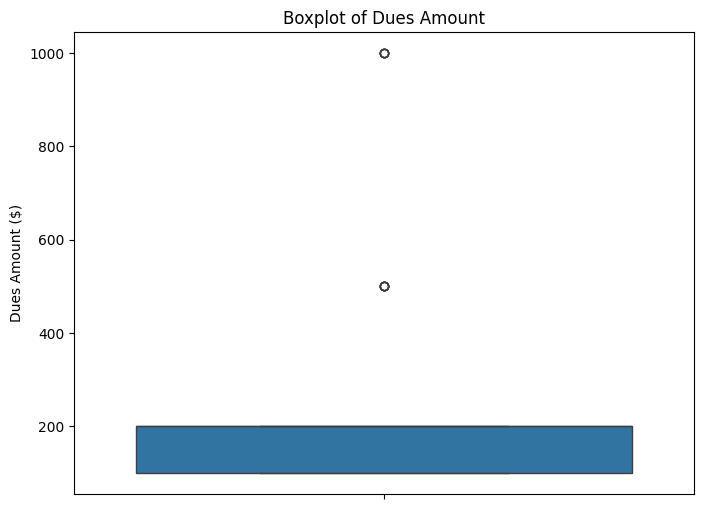

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Dues amount'])  # Gunakan sumbu Y agar lebih jelas
plt.title('Boxplot of Dues Amount')
plt.ylabel('Dues Amount ($)')
plt.show()

In [43]:
print(df['Dues amount'].dtype)


float64


In [44]:
df['Dues amount'].describe()


count      70.000000
mean      255.714286
std       231.964337
min       100.000000
25%       100.000000
50%       200.000000
75%       200.000000
max      1000.000000
Name: Dues amount, dtype: float64

In [45]:
# 4. Identify outliers using the IQR method
Q1 = df['Dues amount'].quantile(0.25)
Q3 = df['Dues amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Dues amount'] < lower_bound) | (df['Dues amount'] > upper_bound)]

print(f"\nOutlier boundaries for Dues amount:")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")
print(f"\nNumber of outliers detected: {len(outliers)}")

if len(outliers) > 0:
    print("\nOutliers in Dues amount:")
    print(outliers[['Member ID', 'Last name', 'First name', 'Dues amount']])


Outlier boundaries for Dues amount:
Lower bound: $-50.00
Upper bound: $350.00

Number of outliers detected: 11

Outliers in Dues amount:
    Member ID          Last name   First name  Dues amount
1      100012                Lei      Colleen        500.0
3      100014  Meneses Contreras   Karl-Oscar        500.0
8      100019           Xiao-Hui      Michael        500.0
16     100027    de Alava Casado   Christophe        500.0
43     100054                Tan        Jenny        500.0
44     100055                Koh        Joyce        500.0
47     100058              Stack      Audette       1000.0
50     100061             Eckert  Rohidasbhai       1000.0
56     100068             Ramsay        Jones       1000.0
57     100069              Corda           Wu       1000.0
69     100081         St-Germain       Poulin       1000.0


In [46]:
median_value = df['Dues amount'].median()
df.loc[(df['Dues amount'] < lower_bound) | (df['Dues amount'] > upper_bound), 'Dues amount'] = median_value


In [47]:
df.iloc[68]

Member ID                                     100081
Last name                                 St-Germain
First name                                    Poulin
Address 1                   600 Dr Frederick Philips
Address 2                              Saint-Laurent
Address 3                                         QC
Address 4                                     Canada
Address 5                                    H4M 2S9
Dues amount                                    200.0
Membership valid through                   2/17/2021
Member type                         Corporate Voting
Name: 69, dtype: object

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 70
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Member ID                 70 non-null     int64  
 1   Last name                 70 non-null     object 
 2   First name                70 non-null     object 
 3   Address 1                 70 non-null     object 
 4   Address 2                 70 non-null     object 
 5   Address 3                 70 non-null     object 
 6   Address 4                 70 non-null     object 
 7   Address 5                 70 non-null     object 
 8   Dues amount               70 non-null     float64
 9   Membership valid through  70 non-null     object 
 10  Member type               70 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 6.6+ KB


In [49]:
# 4. Identify outliers using the IQR method
Q1 = df['Dues amount'].quantile(0.25)
Q3 = df['Dues amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Dues amount'] < lower_bound) | (df['Dues amount'] > upper_bound)]

print(f"\nOutlier boundaries for Dues amount:")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")
print(f"\nNumber of outliers detected: {len(outliers)}")

if len(outliers) > 0:
    print("\nOutliers in Dues amount:")
    print(outliers[['Member ID', 'Last name', 'First name', 'Dues amount']])


Outlier boundaries for Dues amount:
Lower bound: $-50.00
Upper bound: $350.00

Number of outliers detected: 0


In [50]:
# 5. Calculate the total dues and average dues
total_dues = df['Dues amount'].sum()
average_dues = df['Dues amount'].mean()

print(f"\nTotal dues amount: ${total_dues:.2f}")
print(f"Average dues per member: ${average_dues:.2f}")


Total dues amount: $12100.00
Average dues per member: $172.86
